<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Compare-dimensionalities" data-toc-modified-id="Compare-dimensionalities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare dimensionalities</a></span></li><li><span><a href="#Find-&quot;single-gene&quot;-iModulons" data-toc-modified-id="Find-&quot;single-gene&quot;-iModulons-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find "single-gene" iModulons</a></span></li><li><span><a href="#Plot-Components" data-toc-modified-id="Plot-Components-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Components</a></span></li></ul></div>

In [1]:
# import sys
# sys.path.append('/home/tahani/Documents/github/pymodulon')

In [2]:
import pymodulon 
from pymodulon.core import IcaData
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from tqdm.notebook import tqdm

In [3]:
# Directory containing ICA outputs
DATA_DIR = '/home/tahani/Documents/elongatus/data/0_ica_run2'

# Load Data

In [4]:
def load_M(dim):
    return pd.read_csv(os.path.join(DATA_DIR,str(dim),'S.csv'),index_col=0)

def load_A(dim):
    return pd.read_csv(os.path.join(DATA_DIR,str(dim),'A.csv'),index_col=0)

In [5]:
dims = sorted([int(x) for x in os.listdir(DATA_DIR)])
M_data = [load_M(dim) for dim in dims]
A_data = [load_A(dim) for dim in dims]

In [6]:
n_components = [m.shape[1] for m in M_data]

# Compare dimensionalities

In [7]:
final_m = M_data[-1]
thresh = 0.7

In [8]:
final_m

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
Geneid,,,,,,,,,,,,,,,,,,,,,
HKK26_RS00005,0.009562,0.015876,0.087722,0.028457,-0.016495,0.006393,0.001323,-0.008759,-0.032518,-0.033207,...,0.007387,-0.010687,-0.001404,0.049098,-0.036841,0.014741,-0.000665,0.010266,-0.044120,-0.001476
HKK26_RS00010,0.005312,-0.006521,0.012743,-0.002356,-0.000774,0.022403,-0.034409,0.003462,-0.048789,-0.015964,...,0.006470,0.019046,0.004617,0.010067,0.065814,0.006327,-0.012626,-0.009047,-0.002128,-0.033131
HKK26_RS00015,0.000526,0.010632,-0.003314,-0.000800,-0.008142,-0.009678,0.014701,0.006584,-0.012578,-0.007821,...,0.006555,0.018115,-0.000802,0.007202,0.011350,-0.006236,0.017690,0.024891,-0.000237,-0.001132
HKK26_RS00020,0.002148,0.009143,0.004310,-0.022959,-0.018208,0.019348,0.014400,-0.006604,-0.012833,-0.008134,...,0.003694,0.001969,-0.012759,0.018091,-0.003236,0.005107,0.040862,0.011255,-0.033558,-0.027545
HKK26_RS00025,-0.025716,0.002434,0.008901,-0.018674,-0.040137,-0.012564,-0.021257,-0.000839,-0.001513,0.006761,...,0.014676,-0.004157,-0.014091,-0.051704,0.013254,-0.001191,0.021029,-0.009869,-0.003419,0.055725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST32046_p4,-0.007871,0.004352,0.000356,0.035515,-0.010040,-0.011848,0.002633,-0.002699,-0.002926,-0.017170,...,-0.011902,0.015708,0.006782,0.017674,0.001704,-0.001334,0.019063,-0.001560,0.006339,0.017674
ST32046_p5,-0.020370,0.020649,-0.001724,0.008206,0.009236,-0.016738,0.010143,-0.009689,0.010843,0.012954,...,-0.025344,0.002328,-0.033738,0.008984,-0.024639,0.007088,0.014497,-0.004789,0.002911,0.008569
ST32046_p7,0.000191,0.032625,-0.012246,-0.028049,-0.023168,0.011247,0.002404,0.000545,0.000808,0.073420,...,0.031186,-0.016544,0.002561,0.007259,0.082299,0.001516,-0.000088,-0.005205,-0.012020,0.007610


In [9]:
n_final_mods = []
for m in tqdm(M_data):
    corrs = pd.DataFrame(index=final_m.columns,columns=m.columns)
    for col1 in final_m.columns:
        for col2 in m.columns:
            corrs.loc[col1,col2] = abs(stats.pearsonr(final_m[col1],m[col2])[0])
    n_final_mods.append(len(np.where(corrs > thresh)[0]))

  0%|          | 0/21 [00:00<?, ?it/s]

# Find "single-gene" iModulons
At a high enough dimensionality, some iModulons track the expression trajectory of a single iModulon

In [10]:
n_single_genes = []
for m in tqdm(M_data):
    counter = 0
    for col in m.columns:
        sorted_genes = abs(m[col]).sort_values(ascending=False)
        if sorted_genes.iloc[0] > 2 * sorted_genes.iloc[1]:
            counter += 1
    n_single_genes.append(counter)

  0%|          | 0/21 [00:00<?, ?it/s]

# Plot Components

In [11]:
non_single_components = np.array(n_components) - np.array(n_single_genes)

In [12]:
DF_stats = pd.DataFrame([n_components,n_final_mods,non_single_components,n_single_genes],
                        index=['Robust Components','Final Components','Multi-gene Components',
                        'Single Gene Components'],
                        columns=dims).T
DF_stats.sort_index(inplace=True)

In [13]:
dimensionality = DF_stats[DF_stats['Final Components'] >= DF_stats['Multi-gene Components']].iloc[0].name
print('Optimal Dimensionality:',dimensionality)

Optimal Dimensionality: 110


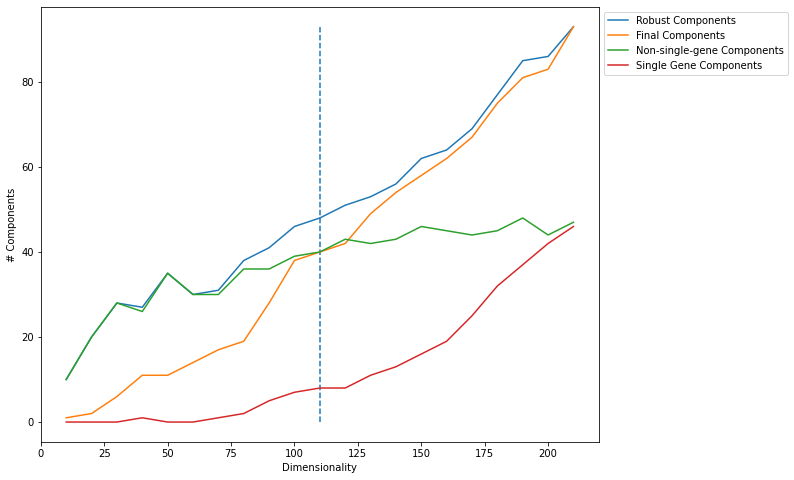

In [22]:
plt.figure(figsize=(10,8))
plt.plot(dims,n_components,label='Robust Components')
plt.plot(dims,n_final_mods,label='Final Components')
plt.plot(dims,non_single_components,label='Non-single-gene Components')
plt.plot(dims,n_single_genes,label='Single Gene Components')

plt.vlines(dimensionality,0,max(n_components),linestyle='dashed')

plt.xlabel('Dimensionality')
plt.ylabel('# Components')
plt.legend(bbox_to_anchor=(1,1))

plt.savefig('dimentionality.pdf', format='pdf', bbox_inches='tight', dpi=1200)

Tahani 
- 02/22/2021